In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('/content/sample_data/california_housing_train.csv')
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


In [16]:
n=9
x=data.iloc[:,0:n-1]
x['bias']=1
x=np.array(x)
x[0]

array([-1.1431e+02,  3.4190e+01,  1.5000e+01,  5.6120e+03,  1.2830e+03,
        1.0150e+03,  4.7200e+02,  1.4936e+00,  1.0000e+00])

In [17]:
y=data.iloc[:,n-1]
y=np.array(y)
y

array([ 66900.,  80100.,  85700., ..., 103600.,  85800.,  94600.])

In [18]:
data_normalized=(data.iloc[:,:-1]-data.iloc[:,:-1].mean())/data.iloc[:,:-1].std()
data_normalized['bias']=1
m=data.shape[0]
n=data_normalized.shape[1]
x=data_normalized.values
y=data.iloc[:, -1].values

In [19]:
def cost(weights,x,y):
  m=x.shape[0]
  pred=np.dot(x,weights)
  sq_error=(pred-y)**2
  total_cost=(1/(2*m))*sq_error.sum()
  return total_cost

In [20]:
def gradient(x,y,weights,alpha,num_iters):
  m = x.shape[0]
  prev_cost=float('inf')
  current_cost=cost(weights,x,y)
  iteration=0
  while abs(prev_cost-current_cost)>threshold:
    pred=np.dot(x,weights)
    errors=pred-y
    gradient=(1/m)*np.dot(x.T,errors)
    weights=weights-alpha*gradient
    prev_cost=current_cost
    current_cost = cost(weights, x, y)
    iteration += 1
  return weights

In [21]:
alpha=0.01
num_iters=10000
threshold=0.0001
weights=np.zeros(n)
weights=gradient(x,y,weights,alpha,num_iters)
print(weights)

[-86501.76880714 -91746.45528274  14483.69465962 -18263.20245574
  49583.89085605 -44180.37296597  17475.93580562  77293.56098799
 207300.91235294]


In [22]:
def predict(x, weights):
    return np.dot(x, weights)
predictions=predict(x,weights)

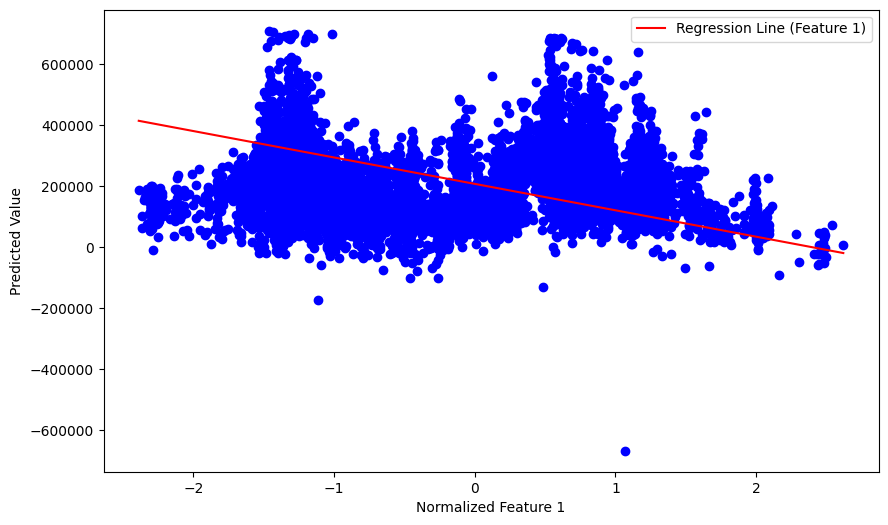

In [23]:
plt.figure(figsize=(10, 6))
plt.scatter(x[:,0],predictions,color='blue')
x_line=np.linspace(min(x[:,0]), max(x[:,0]),100)
y_line=x_line*weights[0]+weights[-1]
plt.plot(x_line, y_line, color='red', label='Regression Line (Feature 1)')
plt.xlabel('Normalized Feature 1')
plt.ylabel('Predicted Value')
plt.legend()
plt.show()